In [64]:
#Loading Packages

import pandas as pd
import nltk
import numpy as np
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alek\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#Importing Comments
df1 = pd.read_csv('Data/Comments1.csv')
df2 = pd.read_csv('Data/Comments2.csv')
df3 = pd.read_csv('Data/Comments3.csv')
df4 = pd.read_csv('Data/Comments4.csv')
df5 = pd.read_csv('Data/Comments5.csv')
df6 = pd.read_csv('Data/Comments6.csv')

#Making sure the column names are the same
df1.columns = ['Article_Title','Article_Author','Article_Publish_Date','Comment_Title','Comment_Body',
              'Comment_Poster','Comment_Date','Comment_Time','Comment_Recs']
df2.columns = df1.columns
df3.columns = df1.columns
df4.columns = df1.columns
df5.columns = df1.columns
df5.columns = df1.columns

#Joining
comments = pd.concat([df1,df2,df3,df4,df5,df6])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [4]:
#List of unique Article Titles
names = comments.Article_Title.unique()

In [5]:
#Initialize the Vader Sentiment Tool
sid = SentimentIntensityAnalyzer()

Sid function provides the weighted scores for negative, neutral, and postitive words. It then gives a compound range from -1 to 1 for overall scores

In [42]:
#String pad to tripple ' for vader

test = comments.iloc[9,4]
scores = sid.polarity_scores(test)

In [55]:
test

'I’m using Sofia’s.\nDamn. Nice goal from Artmedia….Grygera was caught out sleeping on that one.'

In [63]:
scores

{'neg': 0.0, 'neu': 0.473, 'pos': 0.527, 'compound': 0.8309}

In [147]:
#creating a loop to find the average compound scores for articles
scores = []
date = []
ncomm = []

for i in range(0,len(names)):
    
    if (i / 1000 == i // 1000) | (i == len(names)):
        print(str(i)+' of '+str(len(names)))
        
    #filter comments to the appropriate article, save the number of comments
    temp = comments[comments.Article_Title == names[i]]
    ncomm.append(temp.shape[0])
    
    
    if temp.shape[0] != 0:
        temp_scores = []
        for j in range(0,temp.shape[0]):
            
            #Grab comment
            temp2 = temp.iloc[j,4]
            
            #if no comment (nan), make it an empty string
            if type(temp2) == float:
                temp2 = ""
            
            #removing leftovers from html
            temp2 = temp2.replace('\r','').replace('\n','').replace('\p','')
            
            #find score and save score into a temporary array
            temp2 = sid.polarity_scores(temp2)
            temp_scores.append(temp2['compound'])      
        
    #Save the date, and average score of all comments
    if type(temp.iloc[0,2]) != float: 
        date.append(temp.iloc[0,2])
    else:
        date.append(temp.iloc[0,5])
    scores.append(np.mean(temp_scores))    

0 of 5214
1000 of 5214
2000 of 5214
3000 of 5214
4000 of 5214
5000 of 5214


In [172]:
#Put it all into a dataframe
average_sent = pd.DataFrame([names,scores,date,ncomm])
average_sent = average_sent.T
average_sent.columns = ['Article','Av_Score','Date','Number_of_Comments']

#Sort by date
average_sent['Date'] = pd.to_datetime(average_sent.Date)
average_sent = average_sent.sort_values(by='Date')

C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


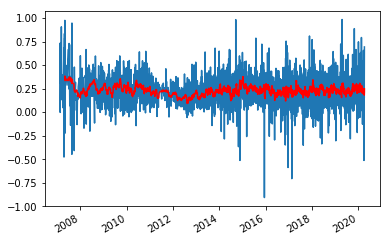

In [180]:
#Plot the suckas
import matplotlib.pyplot as plt
rolling_mean = average_sent.Av_Score.rolling(window=20).mean()

plt.plot(average_sent.Date,average_sent.Av_Score,label='Raw Score')
plt.plot(average_sent.Date,rolling_mean,label='Running Average',color='red')
plt.gcf().autofmt_xdate()
plt.show()

In [161]:
# Some of the most positive and negative articles:

average_sent = average_sent[average_sent.Date > '2008-01-01'].sort_values(by='Av_Score')

In [162]:
average_sent.head(10)

,Article,Av_Score,Date,Number_of_Comments
2567,"Juventus vs. Fiorentina, 2015 Serie A, Round 1...",-0.9054,2015-12-13 04:00:00,1
2712,Allegri: Juventus have a long way to go,-0.7045,2017-02-17 17:48:00,3
2835,Marotta optimistic ahead of Supercoppa,-0.5859,2016-12-20 12:07:00,1
2000,Report: Juventus interested in signing Croatia...,-0.5106,2014-11-22 03:00:00,1
4399,Report: Giorgio Chiellini signing a contract e...,-0.5106,2020-04-01 00:00:00,1
1953,Genoa 1-0 Juventus: Luca Antonini's last-gasp ...,-0.364375,2014-10-30 01:52:00,8
4397,"Juve, players reach agreement on salaries duri...",-0.362159,2020-03-29 00:00:00,17
4088,"Juventus’ Gianluigi Buffon, Paulo Dybala among...",-0.34925,2017-08-17 10:53:00,4
2865,Allegri relieved with Juventus win over Chievo,-0.3466,2016-11-06 08:54:00,3
3542,May’s Monthly Juventus Thoughts: Award Tour,-0.335125,2018-06-05 08:00:00,8


In [182]:
average_sent = average_sent.sort_values(by='Av_Score',ascending=False)

average_sent.head(10)

,Article,Av_Score,Date,Number_of_Comments
4910,Allegri: Juventus won Scudetto despite constan...,0.9878,2019-04-22 00:00:00,1
1927,Carlos Tévez ends goal drought to secure Juven...,0.98655,2014-09-16 22:00:00,2
24,Juventus - Frosinone Preview: Can you smell th...,0.9787,2007-04-30 17:21:00,1
39,An analisis written by a Serie A genius!,0.9501,2007-08-20 18:45:00,2
10,Juventus News 3/6/07- The German Dream,0.91,2007-03-06 11:44:00,1
4549,"Sarri still unclear about handball rules, does...",0.891,2019-11-01 00:00:00,1
16,Weekend Wrap Up - Salutate La Capolista!,0.838,2007-04-24 14:12:00,1
3920,Landmarks of Turin Awards: Juventus vs Barcelo...,0.8126,2017-11-23 09:30:00,1
4434,Sarri: Only perspective is on tomorrow’s match,0.7964,2020-02-21 00:00:00,1
14,Juventus - Verona: Wrap Up- Boum Boum 1-0,0.7897,2007-04-27 23:11:00,1


In [165]:
#Redone with only articles that have more than 10 comments
average_sent_adj = average_sent[average_sent.Number_of_Comments > 10]

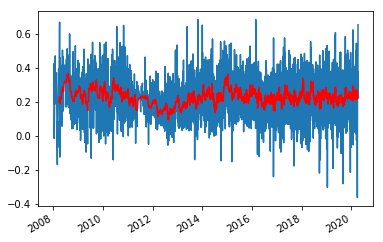

In [179]:
average_sent_adj = average_sent_adj.sort_values(by='Date')

rolling_mean = average_sent_adj.Av_Score.rolling(window=20).mean()

plt.plot(average_sent_adj.Date,average_sent_adj.Av_Score,label='Raw Score')
plt.plot(average_sent_adj.Date,rolling_mean,label='Running Average',color='red')
plt.gcf().autofmt_xdate()
plt.show()

In [168]:
average_sent_adj = average_sent_adj.sort_values(by='Av_Score')

average_sent_adj.head(10)

,Article,Av_Score,Date,Number_of_Comments
4397,"Juve, players reach agreement on salaries duri...",-0.362159,2020-03-29 00:00:00,17
5028,Boxing Day disaster in Serie A: Thoughts on It...,-0.301752,2019-01-13 00:00:00,54
4726,Martusciello preparing for Sarri return tomorrow,-0.280618,2019-08-30 00:00:00,11
2871,Croatia’s team doctor says Juventus were wrong...,-0.239178,2016-11-10 14:33:00,41
5209,Douglas Costa suspended four games for Sassuol...,-0.218302,2018-09-18 00:00:00,57
4529,Juventus draw banged-up but dangerous Lyon for...,-0.213755,2019-12-17 00:00:00,137
4879,Allegri: Racists should be identified and bann...,-0.191913,2019-04-03 00:00:00,75
3991,Report: Juventus ready to offer Alex Sandro a ...,-0.176254,2017-09-05 02:01:00,13
74,Live Coverage: Derby della Mole,-0.16767,2008-02-26 10:54:00,20
2128,Paul Pogba's chances of staying at Juventus? '...,-0.151507,2015-03-08 04:30:00,46


In [171]:
average_sent_adj = average_sent_adj.sort_values(by='Av_Score',ascending=False)

average_sent_adj.head(10)

,Article,Av_Score,Date,Number_of_Comments
3393,Allegri: Juventus can take courage from second...,0.6844,2016-02-24 00:23:00,12
1464,Juventus vs. Genoa Preview: Round 9 — Home is ...,0.683442,2013-10-26 09:00:00,12
81,An addition to the Juventus Offside...,0.668733,2008-03-30 17:22:00,12
4368,"Report: Rodrigo Bentancur, Merih Demiral deeme...",0.653743,2020-04-08 00:00:00,35
1559,"Juventus Youth Update: Mid-season primavera, l...",0.651561,2013-12-29 13:22:00,23
646,PotD: More Of Your Artwork,0.649614,2010-10-28 14:38:00,21
553,One Static Striker Is Often Enough,0.643702,2010-07-19 13:47:00,41
1284,Chronicle of a Scudetto Foretold: Relive the r...,0.642538,2013-05-21 07:00:00,26
4487,Sarri: After Juventus I could retire,0.623682,2020-01-25 00:00:00,17
4844,Rival Q&A: Talking Juventus-Roma with Chiesa d...,0.607108,2019-05-11 00:00:00,12
